In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [110]:
train = pd.read_csv('train.csv')
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,6.806894,236184,27.521246,598,4,5,France,Europe,Northern Hemisphere,0
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,3.015648,264390,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,4.825724,198358,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,6.546390,202828,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1


In [111]:
train["Heart Attack Risk"].mean()

0.3572039942938659

In [112]:
# import math
# train.sort_values(by="Heart Attack Risk", inplace=True)
# train.reset_index(inplace=True)
# for x in range(math.floor(len(train[train["Heart Attack Risk"] == 0])*0.4)):
#     train.drop(x, inplace=True)

In [113]:
train["Heart Attack Risk"].mean()

0.3572039942938659

In [114]:
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,6.806894,236184,27.521246,598,4,5,France,Europe,Northern Hemisphere,0
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,3.015648,264390,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,4.825724,198358,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,6.546390,202828,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1


In [115]:
#train = pd.concat([train, train[train["Heart Attack Risk"] == 1]])

In [116]:
train["Heart Attack Risk"].mean()

0.3572039942938659

In [117]:
train[['Systolic', 'Diastolic']] = train['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type (optional)
train.Systolic = pd.to_numeric(train.Systolic)
train.Diastolic = pd.to_numeric(train.Diastolic)
train = train.drop("Blood Pressure", axis=1)


In [118]:
train["ExcersicePerSedimentary"] = train["Exercise Hours Per Week"]/train["Sedentary Hours Per Day"]

In [119]:
train = train.drop("Patient ID", axis=1)

In [120]:
# This cell makes all object cells and makes them numeric

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

categorical_cols = [col for col in train.columns if train[col].dtype == "object"]
numeric_cols =  [col for col in train.columns if not train[col].dtype == "object"]

ordinal = OrdinalEncoder()

train[categorical_cols] = ordinal.fit_transform(train[categorical_cols])
# THen it scales all the numeric cells down
train[numeric_cols] = pd.DataFrame(MinMaxScaler().fit_transform(train[numeric_cols]))


In [121]:
# train_scaled.columns = train.columns

In [122]:
train.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,ExcersicePerSedimentary
0,0.208333,1.0,0.285714,0.114286,0.0,1.0,1.0,1.0,1.0,0.390335,...,0.042857,0.857143,0.500000,0.0,5.0,1.0,1.0,0.433333,0.60,0.007963
1,0.527778,0.0,0.507143,0.085714,1.0,0.0,1.0,0.0,0.0,0.864921,...,0.393506,1.000000,0.666667,12.0,0.0,0.0,1.0,0.766667,0.90,0.006609
2,0.013889,0.0,0.071429,0.200000,0.0,1.0,0.0,0.0,1.0,0.434723,...,0.658442,0.285714,1.000000,16.0,1.0,0.0,0.0,0.788889,0.98,0.000142
3,0.444444,0.0,0.153571,0.185714,0.0,1.0,1.0,1.0,1.0,0.508052,...,0.728571,0.000000,0.833333,15.0,3.0,1.0,1.0,0.333333,0.04,0.001295
4,0.986111,0.0,0.085714,0.742857,1.0,0.0,1.0,0.0,1.0,0.821871,...,0.149351,0.285714,0.166667,7.0,3.0,0.0,1.0,0.700000,1.00,0.001735


In [123]:
train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic', 'Diastolic',
       'ExcersicePerSedimentary'],
      dtype='object')

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure()
# features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
#        'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
#        'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
#        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
#        'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
#        'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic', 'Diastolic',
#        'ExcersicePerSedimentary']
features = ["BMI", "Income", "Previous Heart Problems"]


# This will find the correlation between a bunch of features and the risk to find out what features to include. 

# for feature in features:
#     train_scaled.plot(x=feature, y="Heart Attack Risk", kind="scatter", ax=ax)
corr = train.corr()


#features = corr[(corr["Heart Attack Risk"]**2 >.0002) & (corr["Heart Attack Risk"]**2 < 1)].index.array
print(features)
X = train[features]
y = train["Heart Attack Risk"]
# X = train.copy()
# y = X.pop("Heart Attack Risk")
#train.plot(x="Heart Attack Risk", y="Sex", kind="bar")


['BMI', 'Income', 'Previous Heart Problems']


<Figure size 640x480 with 0 Axes>

In [125]:
# import math
# def create_new_person(from_df):
#     out = []
#     for col in from_df.columns:
#         out.append(from_df[col].sample(1).to_numpy()[0])
#     return pd.DataFrame([out], columns=from_df.columns)
# for x in range(2000):
#     X = pd.concat([X, create_new_person(X[y==1])])
#     y = pd.concat([y, pd.Series(1)])

In [126]:
y.mean()

0.3572039942938659

In [127]:
X

,BMI,Income,Previous Heart Problems
0,0.566020,0.585955,0.0
1,0.771732,0.684882,1.0
2,0.570769,0.829395,1.0
3,0.790675,0.364040,0.0
4,0.980988,0.571860,1.0
...,...,...,...
7005,0.432850,0.772162,0.0
7006,0.151429,0.872937,0.0
7007,0.885045,0.637017,1.0
7008,0.482167,0.652988,0.0


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [129]:
# X_train = pd.concat([X_train, X_train[y_train== 1]])
# y_train = pd.concat([y_train, y_train[y_train== 1]])

In [130]:
y_train.mean()

0.35716833095577744

In [131]:
# from tensorflow import keras
# from tensorflow.keras import layers

# model = keras.Sequential([
#     layers.InputLayer([X_train.shape[1]]),
#     layers.Dense(4, activation="relu"),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(4, activation="relu"),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(4, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

In [132]:
# # early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


# model.compile(
#     optimizer="adam",
#     loss="binary_crossentropy",
#     metrics=["binary_accuracy"]
# )


In [133]:
# history = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], callbacks=[early_stopping], epochs=50)

In [134]:
# history_df = pd.DataFrame(history.history)
# # Start the plot at epoch 5. You can change this to get a different view.
# history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [135]:
# Import our models
# from sklearn.ensemble import RandomForestClassifier

# # model.fit(X_train, y_train)

# # preds = model.predict(X_valid)
# #preds = np.rint(preds)
# print(preds.min())
# # preds = 1- preds
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# conf_matrix = confusion_matrix(y_valid, preds)
# acc = accuracy_score(y_valid, preds)
# prec = precision_score(y_valid, preds,)
# rec = recall_score(y_valid, preds,)
# f1 = f1_score(y_valid, preds)
# print(f"Confusion Matrix: {conf_matrix}")
# print(f"Accuracy: {acc}")
# print(f"Precision: {prec}")
# print(f"Recall: {rec}")
# print(f"F1 Score: {f1}")


In [136]:
def create_model(train, features):
    X = train[features]
    y = train["Heart Attack Risk"]
    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, f1_score

    model = RandomForestClassifier(random_state=0, n_estimators=100)
    model.fit(X_train, y_train)

    preds = model.predict(X_valid)
    #preds = np.rint(preds)
    print(preds.min())
    # preds = 1- preds
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

    conf_matrix = confusion_matrix(y_valid, preds)
    acc = accuracy_score(y_valid, preds)
    prec = precision_score(y_valid, preds,)
    rec = recall_score(y_valid, preds,)
    f1 = f1_score(y_valid, preds)
    print(f"Confusion Matrix: {conf_matrix}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    return model, preds
fs = train.columns.array
fs = np.setdiff1d(fs, np.array(["Heart Attack Risk"]))
models = []
for x in range(0, len(fs), 4):
    print(fs[x:x+4])
    models.append(create_model(train, fs[x:x+4]))

['Age' 'Alcohol Consumption' 'BMI' 'Cholesterol']
0.0
Confusion Matrix: [[733 168]
 [403  98]]
Accuracy: 0.5927246790299572
Precision: 0.3684210526315789
Recall: 0.19560878243512975
F1 Score: 0.25554106910039115
['Continent' 'Country' 'Diabetes' 'Diastolic']
0.0
Confusion Matrix: [[600 301]
 [343 158]]
Accuracy: 0.5406562054208274
Precision: 0.3442265795206972
Recall: 0.3153692614770459
F1 Score: 0.32916666666666666
['Diet' 'ExcersicePerSedimentary' 'Exercise Hours Per Week'
 'Family History']
0.0
Confusion Matrix: [[694 207]
 [381 120]]
Accuracy: 0.5805991440798859
Precision: 0.3669724770642202
Recall: 0.23952095808383234
F1 Score: 0.2898550724637681
['Heart Rate' 'Hemisphere' 'Income' 'Medication Use']
0.0
Confusion Matrix: [[651 250]
 [349 152]]
Accuracy: 0.572753209700428
Precision: 0.3781094527363184
Recall: 0.3033932135728543
F1 Score: 0.33665559246954596
['Obesity' 'Physical Activity Days Per Week' 'Previous Heart Problems'
 'Sedentary Hours Per Day']
0.0
Confusion Matrix: [[579

In [137]:
preds = []
for m in models:
    preds.append(m[1])
model_results = pd.DataFrame(preds).transpose()
model_results["Combined"] = model_results.apply(lambda x: 1 if x.mean() > 0.35 else 0, axis=1)


In [138]:
model_results

,0,1,2,3,4,5,6,Combined
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...
1397,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1399,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
1400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [139]:
accuracy_score(model_results["Combined"], y_valid)

NameError: name 'accuracy_score' is not defined

In [ ]:
f1_score(model_results["Combined"], y_valid)

0.28809523809523807

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns.array)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.inspection import permutation_importance

importances = permutation_importance(model, X_valid, y_valid, n_repeats=10, scoring="accuracy")
forest_importances = pd.Series(importances.importances_mean, index=X_valid.columns.array)


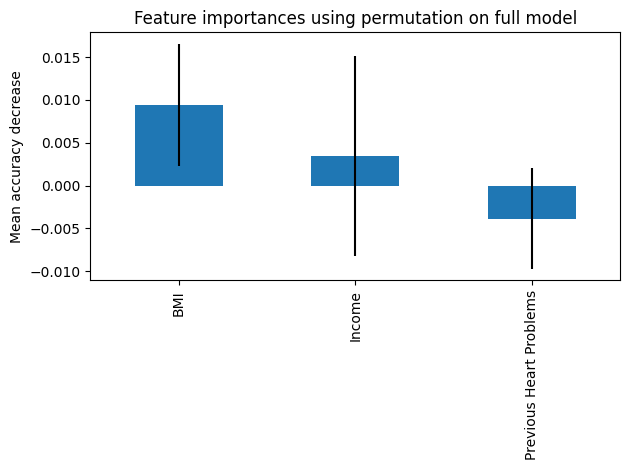

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_valid)
#preds = np.rint(preds)
print(preds.min())
# preds = 1- preds
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_valid, preds)
acc = accuracy_score(y_valid, preds)
prec = precision_score(y_valid, preds,)
rec = recall_score(y_valid, preds,)
f1 = f1_score(y_valid, preds)
print(f"Confusion Matrix: {conf_matrix}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

0.0
Confusion Matrix: [[665 236]
 [364 137]]
Accuracy: 0.572039942938659
Precision: 0.3672922252010724
Recall: 0.27345309381237526
F1 Score: 0.3135011441647597


In [ ]:
# from sklearn.ensemble import BaggingClassifier
# # model = XGBClassifier(n_estimators=500)
# model = BaggingClassifier(KNeighborsClassifier(), max_features=0.5, max_samples=0.5)
# model.fit(X_train, y_train)

# preds = model.predict(X_valid)
# # preds = np.rint(preds)

# # preds = 1- preds
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# conf_matrix = confusion_matrix(y_valid, preds)
# acc = accuracy_score(y_valid, preds)
# prec = precision_score(y_valid, preds)
# rec = recall_score(y_valid, preds)
# f1 = f1_score(y_valid, preds)
# print(f"Confusion Matrix: {conf_matrix}")
# print(f"Accuracy: {acc}")
# print(f"Precision: {prec}")
# print(f"Recall: {rec}")
# print(f"F1 Score: {f1}")


In [ ]:
# from sklearn.svm import LinearSVC

# model = LinearSVC()

# model.fit(X_train, y_train)
# preds = model.predict(X_valid)
# conf_matrix = confusion_matrix(y_valid, preds)
# acc = accuracy_score(y_valid, preds)
# prec = precision_score(y_valid, preds,)
# rec = recall_score(y_valid, preds,)
# f1 = f1_score(y_valid, preds)
# print(preds.max())
# print(f"Confusion Matrix: {conf_matrix}")
# print(f"Accuracy: {acc}")
# print(f"Precision: {prec}")
# print(f"Recall: {rec}")
# print(f"F1 Score: {f1}")

In [ ]:
test_df = pd.read_csv("test.csv")
test_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,3,6.766948,50533,35.074391,191,3,10,Spain,Europe,Southern Hemisphere
1749,FDK8693,34,Female,304,102/92,93,0,1,0,1,...,10,6.900037,223874,22.418494,791,4,5,China,Asia,Northern Hemisphere
1750,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,3,6.634988,228009,23.793280,748,5,8,Spain,Europe,Southern Hemisphere
1751,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,3,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere


In [ ]:
test_df[['Systolic', 'Diastolic']] = test_df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type (optional)
test_df.Systolic = pd.to_numeric(test_df.Systolic)
test_df.Diastolic = pd.to_numeric(test_df.Diastolic)
test_df = test_df.drop("Blood Pressure", axis=1)
ids = test_df.pop("Patient ID")

In [ ]:
categorical_test_cols = [col for col in test_df.columns if test_df[col].dtype == "object"]
test_df[categorical_test_cols] = ordinal.transform(test_df[categorical_test_cols])

#test_scaled= pd.DataFrame(MinMaxScaler().fit_transform(test_df))

In [ ]:

test_df.columns = test_df.columns

In [ ]:
X_test = test_df[features]
X_test

print(features)

y_preds = model.predict(X_test)

['BMI', 'Income', 'Previous Heart Problems']


In [ ]:
y_preds_series = pd.Series(y_preds)

In [ ]:
y_preds_series.mean()

0.0

In [ ]:
submission = pd.DataFrame([ids, y_preds])
submission = submission.transpose()

In [ ]:
submission.columns = ["Patient ID", "Heart Attack Risk"]
submission

,Patient ID,Heart Attack Risk
0,BMW7812,0.0
1,XXM0972,0.0
2,RQX1211,0.0
3,RVN4963,0.0
4,NCU1956,0.0
...,...,...
1748,GQZ5013,0.0
1749,FDK8693,0.0
1750,SVO4635,0.0
1751,KQR8949,0.0


In [ ]:
submission.to_csv("submission.csv", index=False)